# Global fertility rate data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction <a id='intro'></a>

This project aims at exploring global fertility data that was collected from the [Gapminder project](www.gapminder.org). Apart from the fertility data itself, I downloaded four other datasaets with indicators that I assume might be connected to the fertility: 

* child mortality (0-5 year olds dying per 1000 born)
* income per person (GDP/capita, PPP\$ inflation-adjusted)
* women's education (average years spent in school by women aged between 15 and 44 years)
* urban population (\% of total population living in urban areas)

In order to categorise the countries contained in the data as regions, I also downloaded [geographical data](https://www.gapminder.org/data/geo/) including these categories.

The idea is to explore how the fertility rate changed over the past 220 years in the different regions of the world. Furthermore I would like to find out, if the above indicators are correlated with the fertility rate and if the correlation is different depending on the country and/or region investigated. 

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load fertility data
df_fertility_raw = pd.read_csv('fertility.csv')
df_fertility_raw.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82


In [3]:
# check data types
df_fertility_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 434.2+ KB


The above output shows that the countries are stored as strings and the fertility rates are stored as floats for all countries. No adjustments needed. 
***

In [4]:
# check for missing values
sum(df_fertility_raw.isnull().any())

0

The above output shows that there is no missing values in the data.
***

In [5]:
# load child mortality data
df_mortality_raw = pd.read_csv('child_mortality.csv')
df_mortality_raw.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,4.28,4.20,4.14,4.07,4.00,3.94,3.88,3.82,3.76,3.76
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30


In [6]:
# check data types
df_mortality_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


The above output shows that the countries are stored as strings and the mortality rates are stored as floats for all countries. No adjustments needed here. 
***

In [7]:
# check for missing values
sum(df_mortality_raw.isnull().any())

150

This output shows that there are 150 missing values in the data. Since I can see above that there are NaNs for the country Andorra, I am wondering if all the 150 missing values are in that row. 
***

In [8]:
# check missing values for the first 150 data columns of the Andorra row
sum(df_mortality_raw.iloc[3,1:151].isnull())

150

This shows that Andorra is the only country with missing values. As there is no fertility data for Andorra, I will not need this row for my analysis.
***

In [9]:
# load income data
df_income_raw = pd.read_csv('income_per_person.csv')
df_income_raw.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79800,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6740,6880,7020,7160,7310


In [10]:
# check data types
df_income_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


The above output shows that the countries are stored as strings and the income data is stored as ints for all countries. No adjustments needed. 
***

In [11]:
# check for missing values
sum(df_income_raw.isnull().any())

0

The above output shows that there is no missing values in the data.
***

In [12]:
# load education data
df_edu_raw = pd.read_csv('education.csv')
df_edu_raw.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,...,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,0.8
1,Albania,5.6,5.7,5.9,6.0,6.2,6.3,6.5,6.6,6.8,...,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7
2,Algeria,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,...,5.8,5.9,6.1,6.2,6.4,6.5,6.7,6.8,6.9,7.1
3,Angola,0.9,1.0,1.0,1.1,1.1,1.2,1.2,1.3,1.4,...,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5
4,Antigua and Barbuda,8.1,8.3,8.5,8.7,8.8,9.0,9.2,9.4,9.6,...,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.3,13.4,13.5


In [13]:
# check data types
df_edu_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  174 non-null    object 
 1   1970     174 non-null    float64
 2   1971     174 non-null    float64
 3   1972     174 non-null    float64
 4   1973     174 non-null    float64
 5   1974     174 non-null    float64
 6   1975     174 non-null    float64
 7   1976     174 non-null    float64
 8   1977     174 non-null    float64
 9   1978     174 non-null    float64
 10  1979     174 non-null    float64
 11  1980     174 non-null    float64
 12  1981     174 non-null    float64
 13  1982     174 non-null    float64
 14  1983     174 non-null    float64
 15  1984     174 non-null    float64
 16  1985     174 non-null    float64
 17  1986     174 non-null    float64
 18  1987     174 non-null    float64
 19  1988     174 non-null    float64
 20  1989     174 non-null    float64
 21  1990     174 non

The above output shows that the countries are stored as strings and the education data is stored as floats for all countries. Furthermore it turns out that there is only data for 1970-2009. Concerning education, my analysis will be limited to these years. 

I can see in the ouput that there are no missing values. This data frame only has 174 rows, so I will limit the other ones to the respective countries.
***

In [14]:
# load urban population data
df_urban_raw = pd.read_csv('urban_population.csv')
df_urban_raw.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.084,0.0868,0.0898,0.0928,0.0959,0.099,0.102,0.106,0.109,...,0.237,0.239,0.242,0.244,0.246,0.248,0.250,0.253,0.255,0.258
1,Albania,0.307,0.3090,0.3100,0.3110,0.3120,0.312,0.313,0.314,0.314,...,0.522,0.532,0.543,0.554,0.564,0.574,0.584,0.594,0.603,0.612
2,Algeria,0.305,0.3180,0.3320,0.3470,0.3610,0.376,0.388,0.390,0.392,...,0.675,0.682,0.689,0.696,0.702,0.708,0.715,0.721,0.726,0.732
3,Andorra,0.585,0.6100,0.6350,0.6590,0.6820,0.704,0.726,0.746,0.766,...,0.888,0.887,0.886,0.885,0.884,0.883,0.882,0.882,0.881,0.880
4,Angola,0.104,0.1080,0.1120,0.1160,0.1210,0.125,0.130,0.134,0.139,...,0.598,0.605,0.613,0.620,0.627,0.634,0.641,0.648,0.655,0.662


In [15]:
# check data types
df_urban_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  194 non-null    object 
 1   1960     192 non-null    float64
 2   1961     192 non-null    float64
 3   1962     192 non-null    float64
 4   1963     192 non-null    float64
 5   1964     192 non-null    float64
 6   1965     192 non-null    float64
 7   1966     192 non-null    float64
 8   1967     192 non-null    float64
 9   1968     192 non-null    float64
 10  1969     192 non-null    float64
 11  1970     192 non-null    float64
 12  1971     192 non-null    float64
 13  1972     192 non-null    float64
 14  1973     192 non-null    float64
 15  1974     192 non-null    float64
 16  1975     192 non-null    float64
 17  1976     192 non-null    float64
 18  1977     192 non-null    float64
 19  1978     192 non-null    float64
 20  1979     192 non-null    float64
 21  1980     192 non

The above output shows that the countries are stored as strings and the urbanity data is stored as floats for all countries. Furthermore it turns out that there is only data for 1960-2019. Concerning urbanity, my analysis will be limited to these years.

I can see that there is data for 194 countries between 1990 and 2011 but only for 192 and 193 countries before and after that time period. Since I will limit my analysis to 174 countries (see above) this will not be a problem.
***

In [16]:
# load geographical data
df_geo_raw = pd.read_csv('country_regions.csv',sep=';')
df_geo_raw.head()

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33,66,19.11.1946,South Asia,Low income,NaN
1,alb,Albania,europe,europe_east,europe_central_asia,others,41,20,14.12.1955,Europe & Central Asia,Upper middle income,NaN
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28,3,8.10.1962,Middle East & North Africa,Upper middle income,NaN
3,and,Andorra,europe,europe_west,europe_central_asia,others,"42,50779","1,52109",28.7.1993,Europe & Central Asia,High income,NaN
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,"-12,5","18,5",1.12.1976,Sub-Saharan Africa,Lower middle income,NaN


In [17]:
# check data types in the columns that will be used
df_geo_raw[['name','four_regions']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          197 non-null    object
 1   four_regions  197 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


This output shows that both the country names and the region categories are stored as strings and that there are no missing values. No adjustments needed.

### Data Cleaning

There are three data cleaning steps that I will perform.

1. I am interested in the time period between 1800 and 2020. This means I will drop the columns for later years. As already noted above, the education and urbanity data does not cover this whole time period but this just means I need to limit my analysis in those cases. 

2. In the geography data frame I only want to keep the countries and eight_regions columns, so I will drop the other ones.

3. I want to merge each of the data frames with the geography data frame to enable an easy categorisation of the data in the later analysis. I will do this with an inner merge to avoid missing values.

4. The above basic properties showed that the education indicator has data for 174 countries, while the fertility data frame contains 184 rows. The other three indicators have data for more than 184 countries. I will thus filter those data frames and keep only the countries that are also contained in the fertility data frame.

In [18]:
# 1. drop years later than 2020 in the respective data frames 
df_fertility_2020 = df_fertility_raw.drop(df_fertility_raw.columns[222:],axis=1)
df_mortality_2020 = df_mortality_raw.drop(df_mortality_raw.columns[222:],axis=1)
df_income_2020 = df_income_raw.drop(df_income_raw.columns[222:],axis=1)

In [19]:
# 2. re-write geography data frame, only keeping country and eight_regions
df_geo_large = df_geo_raw[['name','four_regions']]
df_geo_large = df_geo_large.rename(columns={'name':'country'})

In [20]:
# 3a. define function for merging
def country_merge(df_1,df_2):
    df_merged = pd.merge(df_1, df_2, on="country", how="inner")
    return df_merged

In [21]:
# 3b. merge data frames with region categories
df_fertility_cat = country_merge(df_geo_large, df_fertility_2020)
df_mortality_cat = country_merge(df_geo_large, df_mortality_2020)
df_income_cat = country_merge(df_geo_large, df_income_2020)
df_edu_cat = country_merge(df_geo_large, df_edu_raw) 
df_urban_cat = country_merge(df_geo_large, df_urban_raw)

In [23]:
# 4a. make sure the same countries are used in all data frames
df_geo_1 = country_merge(df_geo_large, df_fertility_cat.country)
df_geo_2 = country_merge(df_geo_1, df_mortality_cat.country)
df_geo_3 = country_merge(df_geo_2, df_income_cat.country)
df_geo_4 = country_merge(df_geo_3, df_edu_cat.country)
df_geo = country_merge(df_geo_4, df_urban_cat.country)

In [24]:
# 4b. filter data and reset each index
countries = df_geo.country
df_fertility = df_fertility_cat[df_fertility_cat.country.isin(countries)].reset_index(drop=True)
df_mortality = df_mortality_cat[df_mortality_cat.country.isin(countries)].reset_index(drop=True)
df_income = df_income_cat[df_income_cat.country.isin(countries)].reset_index(drop=True)
df_edu = df_edu_cat[df_edu_cat.country.isin(countries)].reset_index(drop=True)
df_urban = df_urban_cat[df_urban_cat.country.isin(countries)].reset_index(drop=True)

<a id='eda'></a>
## Exploratory Data Analysis

In this exploratory data analysis, I will try to answer the questions raised in the introduction.

### How has the global fertility rate changed over time?

In [25]:
df_fertility.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,6.107544,6.104444,6.108246,6.107368,6.107953,6.107836,6.103275,6.102047,6.093450,6.080819,...,3.002456,2.972339,2.942515,2.908772,2.874561,2.839883,2.806550,2.774094,2.742690,2.712573
std,0.797196,0.800840,0.794121,0.793073,0.792913,0.788997,0.794505,0.795316,0.810879,0.841031,...,1.512428,1.481610,1.450975,1.422258,1.393812,1.365044,1.336024,1.306851,1.277945,1.249935
min,4.040000,4.040000,3.910000,4.050000,3.940000,4.060000,4.070000,4.050000,4.000000,3.210000,...,1.210000,1.220000,1.240000,1.250000,1.240000,1.240000,1.230000,1.230000,1.230000,1.230000
25%,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,...,1.795000,1.790000,1.790000,1.780000,1.770000,1.750000,1.750000,1.750000,1.740000,1.735000
50%,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.160000,6.160000,...,2.530000,2.480000,2.450000,2.420000,2.390000,2.360000,2.340000,2.310000,2.290000,2.260000
75%,6.745000,6.745000,6.745000,6.745000,6.745000,6.745000,6.745000,6.745000,6.745000,6.745000,...,4.200000,4.135000,4.050000,3.980000,3.915000,3.850000,3.795000,3.740000,3.675000,3.605000
max,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,...,7.460000,7.420000,7.380000,7.340000,7.290000,7.240000,7.180000,7.130000,7.070000,7.000000


Just a quick inspection of the descpritive statsitcs shows two interesting points: 
* The mean global fertility rate decreased from 6.11 to 2.71 children in the past 220 years
* On the other hand, the standard deviation increased from 0.80 to 1.25. This implies that the differences among countires has increased over time. 

The following graphs will visualise and elaborate on these insights.

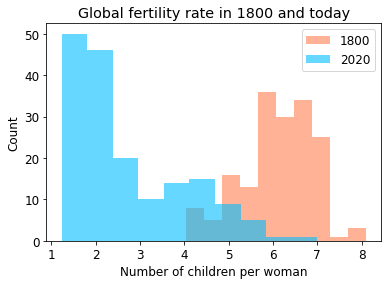

In [26]:
plt.rcParams.update({'font.size': 12})

plt.hist(df_fertility['1800'], color='coral', alpha=.6, label='1800');
plt.hist(df_fertility['2020'], color='deepskyblue', alpha=.6, label='2020');

plt.title('Global fertility rate in 1800 and today')
plt.xlabel('Number of children per woman')
plt.ylabel('Count')
plt.legend();

The above histogram shows that not only the standard deviation has increased between 1800 and 2020. While in 1800 the global fertility rate was slightly skewed to the left, in 2020 the data is very much skewed to the right. Most women nowadays give birth to 1-2 children, while some have 4-5 and a few have up to 7 children.

To explore the changes over time in more detail, I will plot the fertility rate over time and have a look at the different regions of the world.

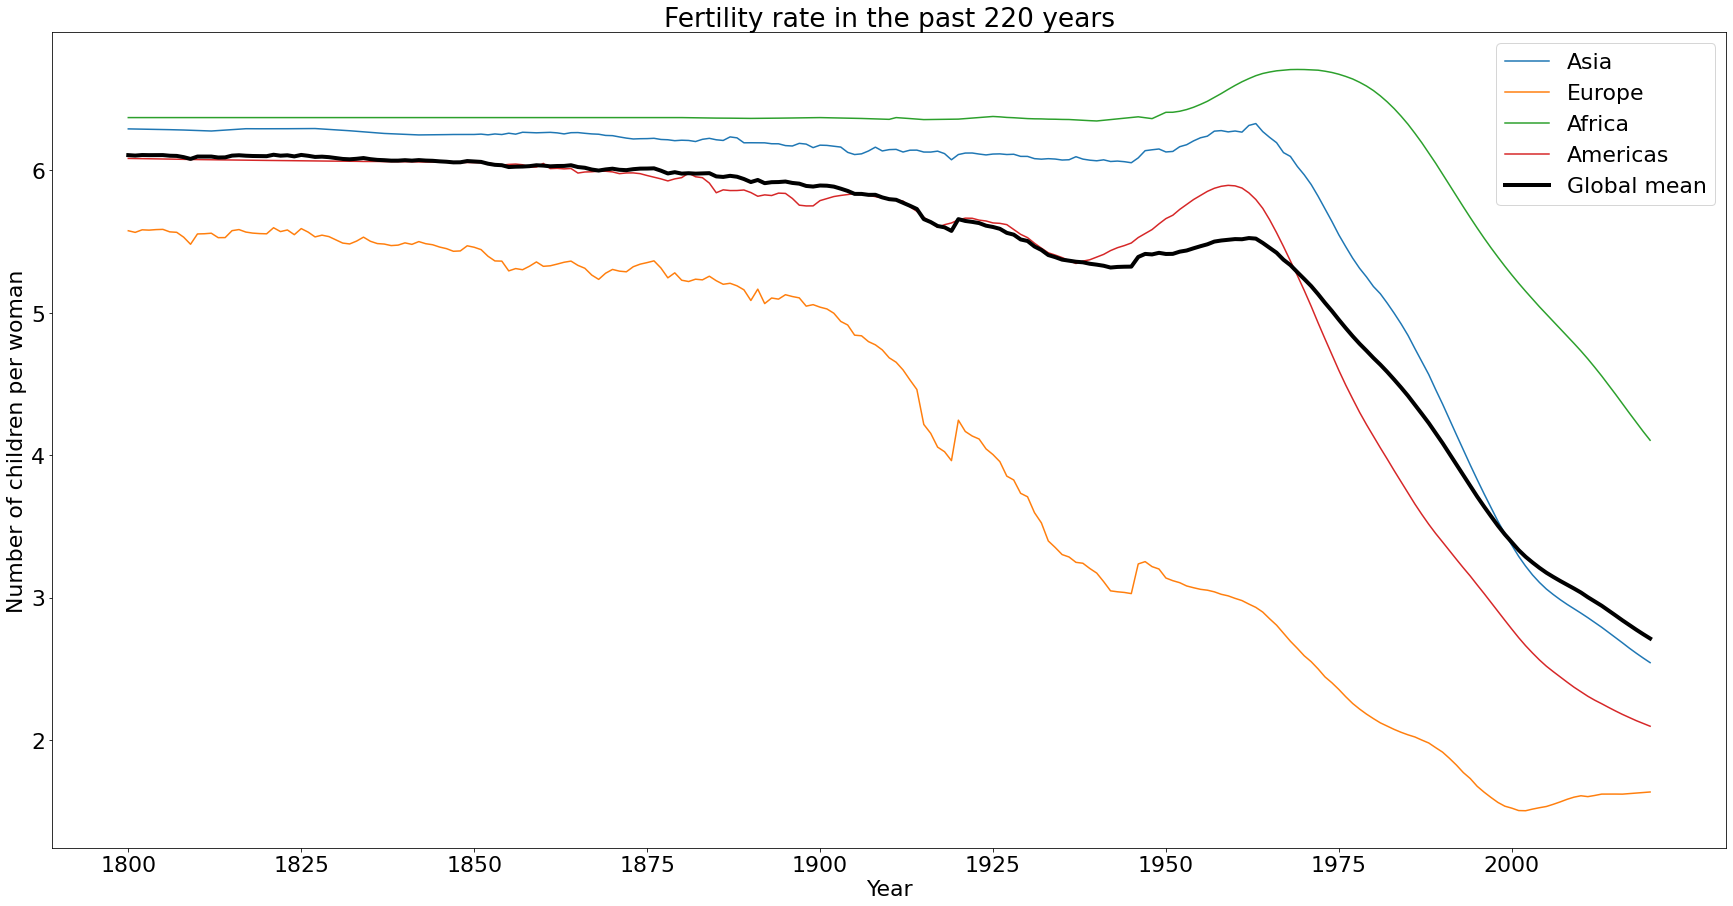

In [27]:
plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 22})

for r in df_geo['four_regions'].unique():
    plt.plot(df_fertility.groupby('four_regions').mean().loc[r], label=r.title());
plt.plot(df_fertility.mean(), label='Global mean', linewidth=4, color='black');

plt.xticks(np.linspace(0,200,num=9), ['1800','1825','1850','1875','1900','1925','1950','1975','2000']);
plt.title('Fertility rate in the past 220 years')
plt.xlabel('Year')
plt.ylabel('Number of children per woman')
plt.legend();

The above plot clearly shows the differences among the regions of the world. In the first half of the investigated time period the birth rates were similar and rather constant in all parts of the world. Only in Europe women gave birth to less children than in the rest of the world. With the beginning of the industrialisation in Europe, the fertilty rate drastically decreased further. As an interesting side fact, it seems that both the First and the Second World War affected birth rates in Europe. \
Around 1910 the global birth rates started to diverge with the largest differences between about 1950 and 1980.\
In most parts of the world except Europe the fertility rate shortly increased in the 1960ies and 1970ies and then clearly decreased to values similar to the European ones. In almost all parts of the world women on average have between 1 and 3 children nowadays. Only in Sub Saharan Africa 4-5 children are born on average.

### Is the global fertility rate correlated with the four chosen indicators?

The four indicators mentioned in the introduction might be correlated to the number of children women had in the past and have nowadays. Based on the figure above, I will have a look at this correlation in four prominent years: 1800, 1910, 1965 and 2020. The education and urbanity data do not go back so much in the past and are not completely up to date. I will thus use divergent years for these indicators.

In [28]:
# define function for scatter plots
def plot_indicators(x, y, years):
    for year in years:
        r = x.corrwith(y[year])[year] # correlation coefficient
        plt.scatter(x[year], y[year], alpha=.6, label='{}, r = {}'.format(year,round(r,2)));

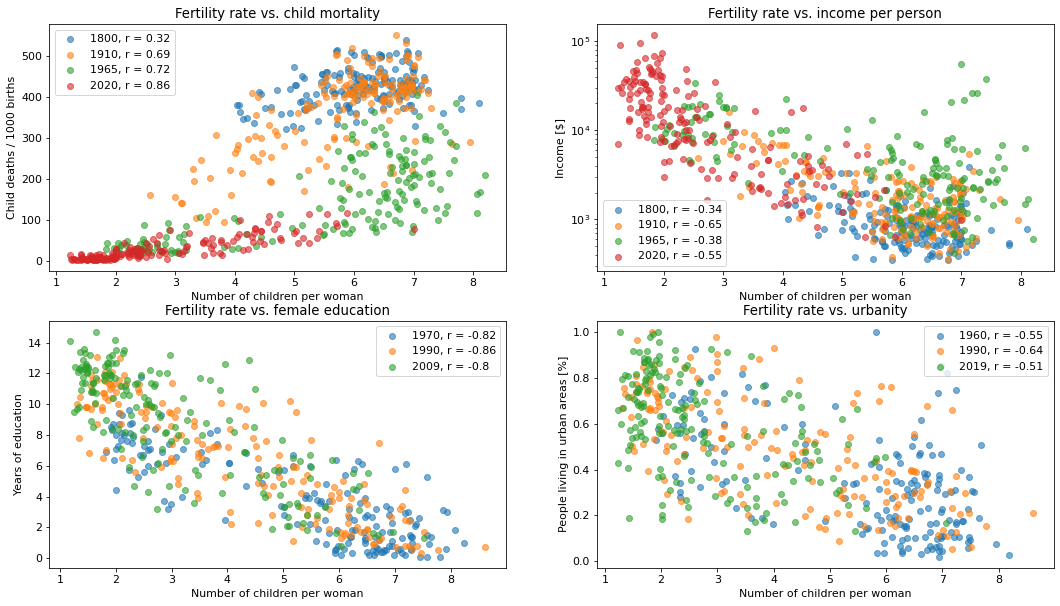

In [29]:
fig = plt.figure(figsize=(18,10)) 
plt.rcParams.update({'font.size': 11})

# Indicator: child mortality
years = ['1800','1910','1965','2020']
plt.subplot(2, 2, 1)
plot_indicators(df_fertility, df_mortality, years)
plt.title('Fertility rate vs. child mortality')
plt.xlabel('Number of children per woman')
plt.ylabel('Child deaths / 1000 births')
plt.legend();

# Indicator: income
plt.subplot(2, 2, 2)
plot_indicators(df_fertility, df_income, years)
plt.yscale('log') # use logarithmic y-scale because of large spread of income data
plt.title('Fertility rate vs. income per person')
plt.xlabel('Number of children per woman')
plt.ylabel('Income [$]')
plt.legend();

# Indicator: education
years = ['1970','1990','2009'] # change years because of limited data
plt.subplot(2, 2, 3)
plot_indicators(df_fertility, df_edu, years)
plt.title('Fertility rate vs. female education')
plt.xlabel('Number of children per woman')
plt.ylabel('Years of education')
plt.legend();

# Indicator: urbanity
years = ['1960','1990','2019'] # change years because of limited data
plt.subplot(2, 2, 4)
plot_indicators(df_fertility, df_urban, years)
plt.title('Fertility rate vs. urbanity')
plt.xlabel('Number of children per woman')
plt.ylabel('People living in urban areas [%]')
plt.legend();

#### Child mortality
In the top left figure it can be seen that the correlation between child mortality and fertility rate has changed over time. While in 1800 it was low, it steadily increased and in 2020 was quite high and positive with 0.86. Thus, in countries with high child mortality, women nowadays generally have more children. 

#### Income per person
The top right figure shows that this indicator does not correlate very high with the fertility rate. However, there was a tendency for a negative correlation in 1910 and 2020, meaning that women had more children in countries with lower income per person. It must be noted that the y-axis in the top right figure is logarithmic because of the large income differences among the world. A visual inspection of this scatter plot implies a non-linear correlation, which is not represented by the correlation coefficient shown in the legend of the figure.

#### Education
It is very interesting and striking to see in the bottom left figure that the negative correlation between the number of years a woman spent in school and the number of children she had was almost constant and quite high between 1970 and 2009 on a global level. So, in countries where women had a shorter education they generally had more children.

#### Urbanity 
The bottom right figure shows that the correlation between the fertility rate and the percentage of people living in urban areas was quite constant in the past 50 years. The linear relationship is negatvie but not very strong, so there is a slight tendency for women to have more children in rural areas.
***

### How is the correlation different in the various parts of the world?
The above visualsiations and correlation coefficients revealed some interesting insights. Now I would like to find out, if and how the correlations differ among the world regions. I will concentrate on the most recent year for which data are available. This is 2020 for child mortality and income person, 2009 for education and 2019 for urbanity.

In [30]:
def plot_indicators_region(x,y,year,reg):
    x = x[x['four_regions']==reg] # x-axis
    y = y[y['four_regions']==reg] # y-axis
    r = x.corrwith(y[year])[year] # correlation coefficient
    plt.scatter(x[year], y[year], alpha=.6, color=col[i-1], label='r = {}'.format(round(r,2)));

In [32]:
# plot parameters
year = '2020'
col = ['tab:blue','tab:orange','tab:gray','tab:cyan'];

<Figure size 1296x720 with 0 Axes>

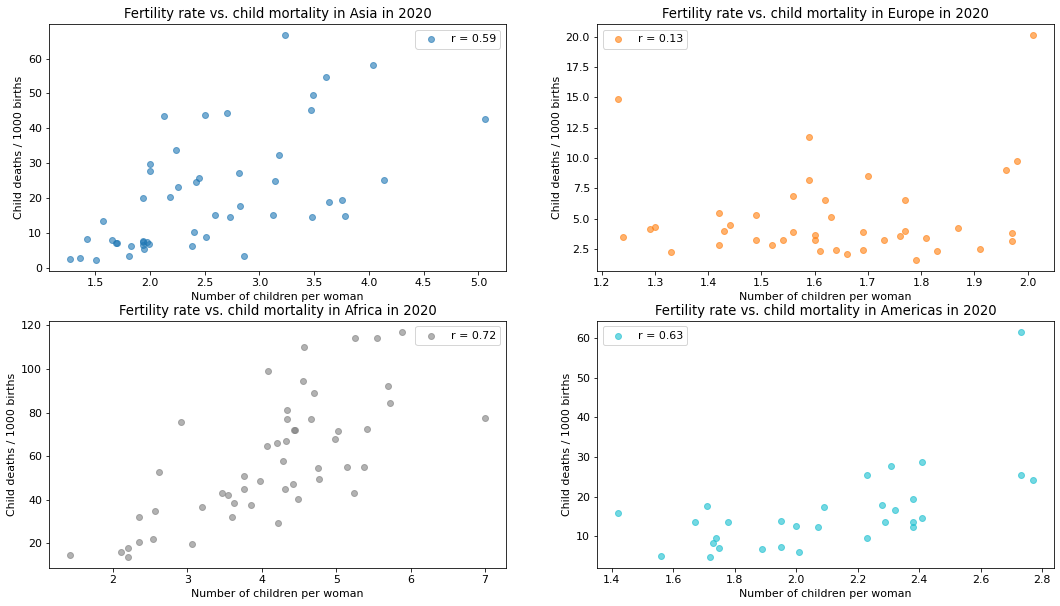

In [35]:
# Indicator: child mortality
fig = plt.figure(figsize=(18,10));
plt.rcParams.update({'font.size': 11});
i = 1
for reg in df_geo.four_regions.unique():
    plt.subplot(2, 2, i)
    plot_indicators_region(df_fertility,df_mortality,year,reg)
    plt.title('Fertility rate vs. child mortality in {} in {}'.format(reg.title(),year))
    plt.xlabel('Number of children per woman')
    plt.ylabel('Child deaths / 1000 births')
    plt.legend();
    i += 1

On a global level the correlation between child mortality and fertility rate was quite high in 2020. The above figures reveal that the positive correlation is particularly high in Africa (bottom left). It is intermediate in Asia and the Americas (top left and bottom right) and very low in Europe (top right). This underpins that the there are large differences between the more and less developed regions of the word.

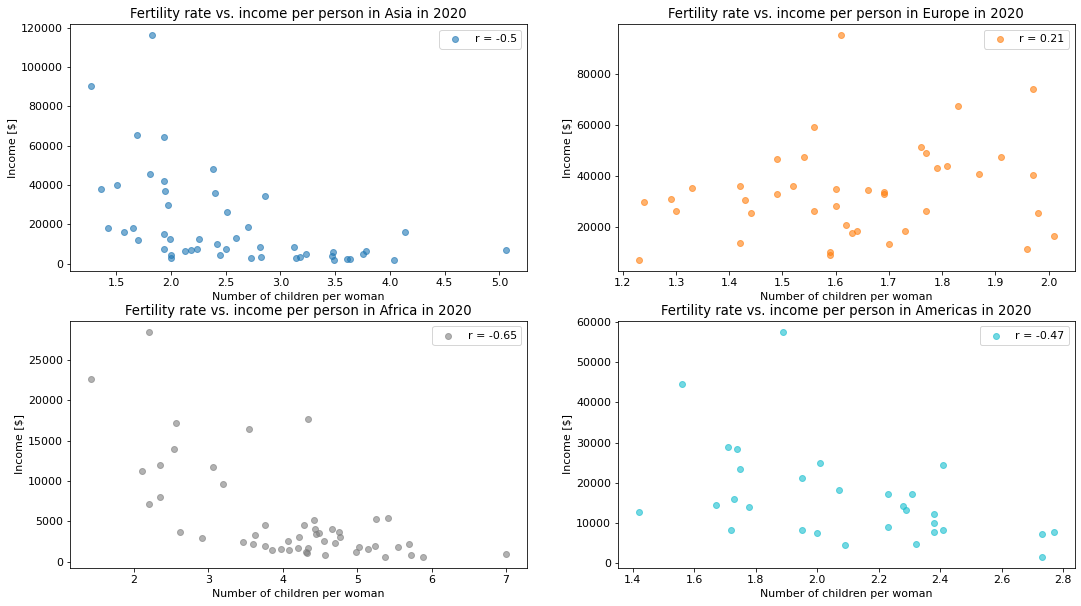

In [36]:
# Indicator: income
fig = plt.figure(figsize=(18,10));
plt.rcParams.update({'font.size': 11});
i = 1
for reg in df_geo.four_regions.unique():
    plt.subplot(2, 2, i)
    plot_indicators_region(df_fertility,df_income,year,reg)
    plt.title('Fertility rate vs. income per person in {} in {}'.format(reg.title(),year))
    plt.xlabel('Number of children per woman')
    plt.ylabel('Income [$]')
    plt.legend();
    i += 1

As already seen, the relationship between income per person and fertility rate is not very strong but as for the child mortality it is strongest for African countries (bottom left) and lowest for European countries (top right).

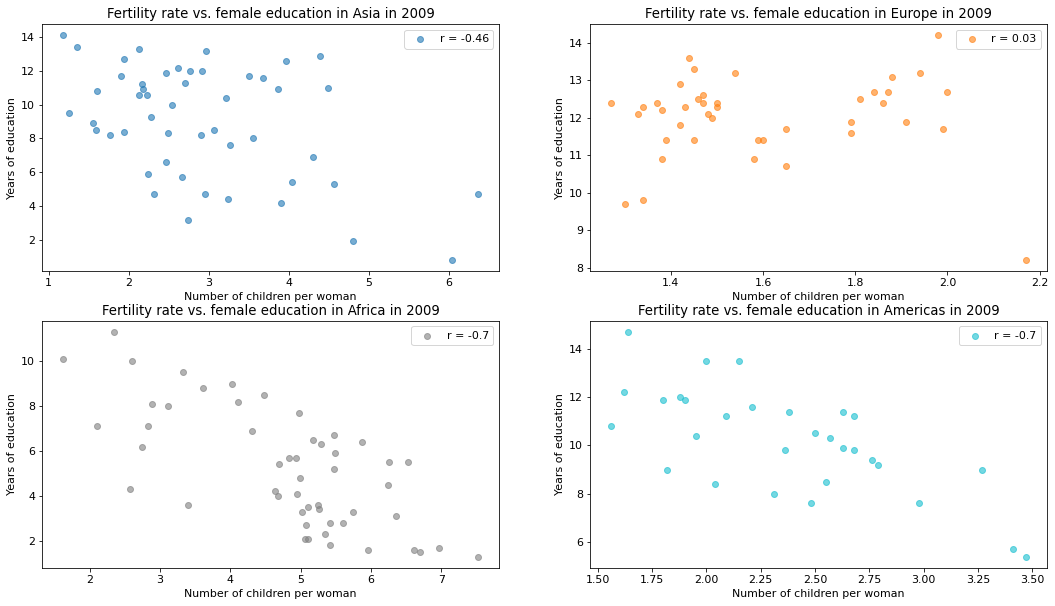

In [38]:
# Indicator: education
year = '2009' # change year because of limited data
fig = plt.figure(figsize=(18,10));
plt.rcParams.update({'font.size': 11});
i = 1
for reg in df_geo.four_regions.unique():
    plt.subplot(2, 2, i)
    plot_indicators_region(df_fertility,df_edu,year,reg)
    plt.title('Fertility rate vs. female education in {} in {}'.format(reg.title(),year))
    plt.xlabel('Number of children per woman')
    plt.ylabel('Years of education')
    plt.legend();
    i += 1

This analysis shows that in African and American countries women who have less years of education in general have more children (bottom figures). In contrast, there is no linear relationship in European countries (top right).

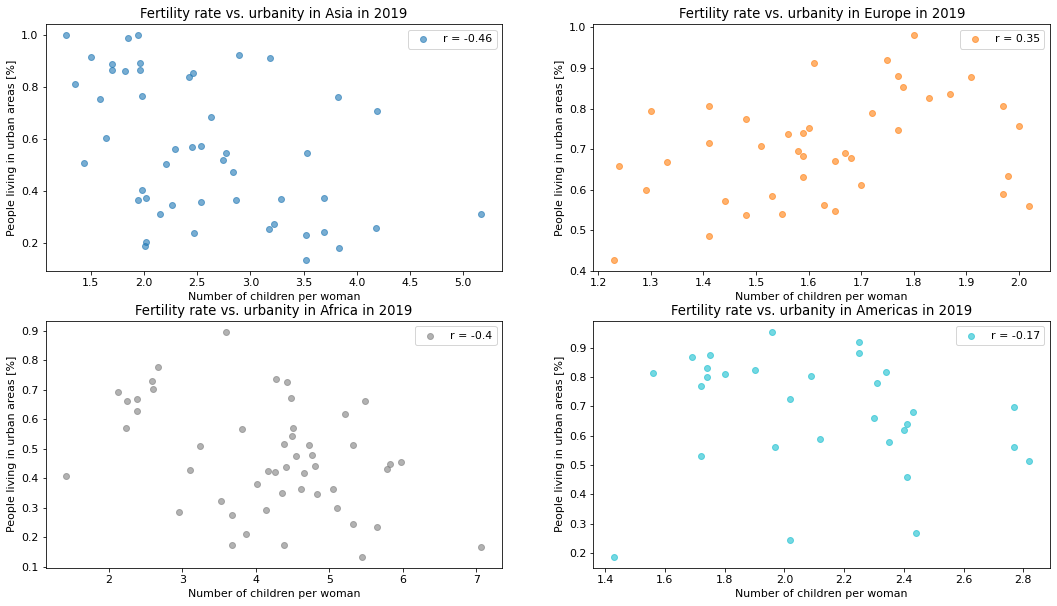

In [39]:
# Indicator: urbanity
year = '2019' # change year because of limited data
fig = plt.figure(figsize=(18,10));
plt.rcParams.update({'font.size': 11});
i = 1
for reg in df_geo.four_regions.unique():
    plt.subplot(2, 2, i)
    plot_indicators_region(df_fertility,df_urban,year,reg)
    plt.title('Fertility rate vs. urbanity in {} in {}'.format(reg.title(),year))
    plt.xlabel('Number of children per woman')
    plt.ylabel('People living in urban areas [%]')
    plt.legend();
    i += 1

As already seen on a global level, the linear relationship between the percentage of people living in urban areas and the fertility rate is quite week. This is similar for the four investigated regions of the world.

<a id='conclusions'></a>
## Conclusions
### Changes over time
The mean global fertility rate has changed considerably over the past 220 years, as it dropped from about 6 to 2-3 children per woman between 1800 and 2020. However, the fertility was rather constant for about 100 years only started decreasing in the beginning of the 20th century. This was also the point in time when the fertility rate started to diverge among the regions of the world, with a maximum spread in the 1960ies and 1970ies. By 2020, the fertility rates of the world regions have converged again.\
Conducting an ANOVA could shed more light on the effect of the world region on the fertility rate.

### Correlation with indicators
The strongest correlation between the fertility rate and the investigated indicators was observed for education and child mortality:
* Between 1960 and 2009 women with less education were more likely to have more children. This was especially the case if they live in Africa or the Americas, while in Europe the correlation was very low. 
* While in 1800 there was no linear relationship between child mortality and the fertility rate, this correlation has increased with time. In 2020 women had more children in countries with higher child mortality and again, this was especially the case in Africa but not in Europe.

The income per person in a country is not linearly correlated with the fertility rate. However, the visualisations above imply a logarithmic relationship. This could be further investigated. 

The amount of people living in urban areas does not seem to be correlated with the fertility rate in a specific country and this is similar for the different world regions. 

With a linear regression, the effects of these indicators could be investigated more specifically.

### Limitations
This analysis only scrapes on the surface of what could be explored. As stated above, linear regression and ANOVA could clarify more clearly the influence of factors and variables. \
Furthermore, the data concerning female education and the urbanity level of a country are not available for very early and most recent years. At the same time, the relationship between female education and fertility rate was quite strong. It would be interesting to see if this is still the case nowadays and how the relationship was 200 years ago. 

